<a href="https://colab.research.google.com/github/rj7shakya/python_ml/blob/main/5_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data preparation using normal distribution

In [25]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


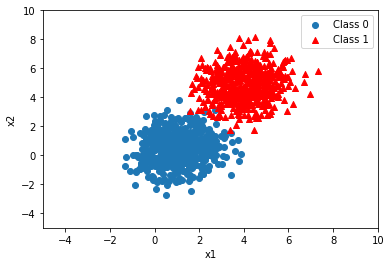

In [26]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [27]:
data = np.zeros((1000,3))
print(data.shape)
data

(1000, 3)


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [35]:
np.random.shuffle(data)
print(data[:10])

[[ 4.64702363  5.49334277  1.        ]
 [ 0.78149748 -0.54523628  0.        ]
 [ 0.48463043  1.02844023  0.        ]
 [ 5.39034648  5.57873802  1.        ]
 [ 3.17322701  2.66958265  1.        ]
 [ 3.70856731  4.43826313  1.        ]
 [-0.59303589 -0.51103641  0.        ]
 [ 1.68859628  0.45232328  0.        ]
 [ 0.87896908  1.389041    0.        ]
 [ 2.2237132   0.05157381  0.        ]]


In [36]:
split = int(0.8*data.shape[0])

In [37]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression Functions

In [38]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [39]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

In [40]:
def error(y_true,x,w,b):
    m = x.shape[0]
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    
    return -err/m

In [41]:
def get_grads(y_true,x,w,b):  
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]

In [42]:
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

In [43]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [44]:
def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [45]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [46]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

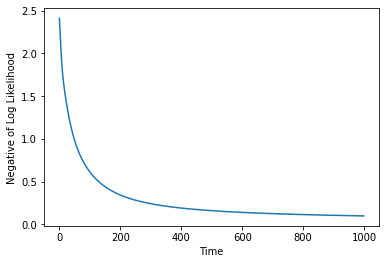

In [47]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

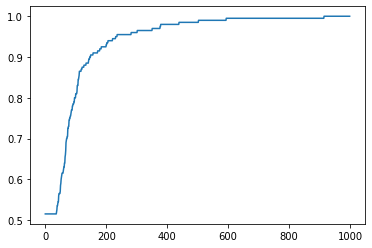

1.0


In [48]:
plt.plot(acc)
plt.show()
print(acc[-1])

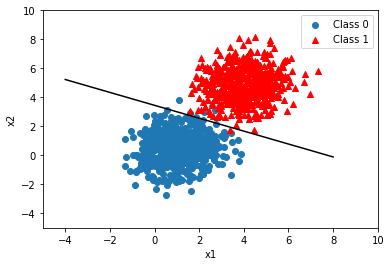

In [49]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [50]:
print(W)
print(b)

[0.59980106 1.34760761]
-4.648184615018576


# logistic using sklearn

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train,Y_train)

LogisticRegression()

In [54]:
print(model.intercept_, model.coef_)

[-12.75121428] [[2.18823443 2.72897382]]


In [55]:
model.score(X_train, Y_train)

0.995